# Question3

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Load the diabetes data (assuming you have the dataset in an excel file)
diabetes_data = pd.read_excel("Diabetes_Data.xlsx")

# Extract the explanatory variables (features) from the dataset
explanatory_variables = diabetes_data.iloc[:, :-1]

# Calculate the correlation matrix
correlation_matrix = explanatory_variables.corr()

# print correlation_matrix
print(correlation_matrix)

          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           S4        S5        S6  
AGE  0.203841  0.270774  0.301731  
SEX  0.332115  0.149916  0.208133  
BMI  0.413807  0.446157  0.388680  
BP   0.2

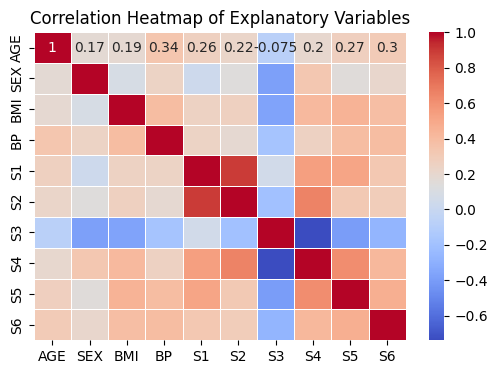

In [15]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Explanatory Variables")
plt.show()

# Relationships between Variables

The heatmap will visually represent the correlations between explanatory variables. Positive correlations are indicated by warmer colors (red), while negative correlations are shown in cooler colors (blue). A correlation close to 1 or -1 indicates a strong linear relationship between variables, while a correlation near 0 suggests a weak or no relationship. Analyzing the heatmap helps to identify which variables are strongly correlated with each other.

In [16]:
# Fit a linear model using Scikit-Learn
X = explanatory_variables
y = diabetes_data['Y']
model1 = LinearRegression().fit(X, y)
y_pred = model1.predict(X)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

# Calculate adjusted R-squared using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
adj_r2 = model.rsquared_adj

# Check significance of variables
print("Adjusted R2: ", adj_r2)
print("\nMean Squared Error: ", mse)
print()
print(model.summary())

Adjusted R2:  0.5065592904853231

Mean Squared Error:  2859.6963475867506

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 04 May 2024   Prob (F-statistic):           3.83e-62
Time:                        08:18:31   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector
# define SequentialFeatureSelector
linear = LinearRegression()
selection_feature = SequentialFeatureSelector(linear, k_features='best', forward=True, scoring='neg_mean_squared_error')
selection_feature.fit(X, y)
selection_feature

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 11),
                          scoring='neg_mean_squared_error')

In [18]:
significant_feature = list(X.columns[list(selection_feature.k_feature_idx_)])
print(significant_feature)

['const', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5']


# Build model2 with only significant estimators

In [19]:
# Fit a linear model using Scikit-Learn
significant_feature = diabetes_data.iloc[:, 1:-2]

X = significant_feature
y = diabetes_data['Y']
model2 = LinearRegression().fit(X, y)
y_pred = model2.predict(X)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
adj_r2 = model2.rsquared_adj

print("Adjusted R2: ", adj_r2)
print("\nMean Squared Error: ", mse)

Adjusted R2:  0.5076402074518469

Mean Squared Error:  2866.6729630254804


# Question 4

In [20]:
# Load the Titanic dataset
titanic_data = pd.read_csv("titanic3.csv")

# Calculate the probability of survival
survival_probability = titanic_data['survived'].mean()
print("Probability of Survival:", survival_probability)

Probability of Survival: 0.3819709702062643


In [21]:
#set the age interval
age_interval = [0, 18, 80]
label = ['0-18', '19-80']
titanic_data['Age_Group'] = pd.cut(titanic_data['age'], bins=age_interval, labels=label)

#group data by passenger class, gender, and age, and calculate the mean survival for each group
survival_table = titanic_data.groupby(["pclass", "sex", "Age_Group"])["survived"].mean()

#display the table
print(survival_table)

pclass  sex     Age_Group
1       female  0-18         0.923077
                19-80        0.966667
        male    0-18         0.750000
                19-80        0.328671
2       female  0-18         0.952381
                19-80        0.878049
        male    0-18         0.523810
                19-80        0.087591
3       female  0-18         0.534483
                19-80        0.436170
        male    0-18         0.208333
                19-80        0.158845
Name: survived, dtype: float64


C:\Users\robot\AppData\Local\Temp\ipykernel_21300\3480336981.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_table = titanic_data.groupby(["pclass", "sex", "Age_Group"])["survived"].mean()


In [22]:
#prepare the data
X = titanic_data[["pclass", "sex", "age"]].copy()
y = titanic_data["survived"]

# encode categorical variables (sex) as binary
X["sex"] = X["sex"].map({"female": 0, "male": 1})

# Handle missing values in the age column by filling with the mean
X["age"].fillna(X["age"].mean(), inplace=True)

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# remove the outliers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Build and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print the model coefficients (parameter estimates)
coefficients = model.coef_
intercept = model.intercept_
print("Model Coefficients (Parameters):")
print("Intercept (Bias):", intercept)
print("Coefficient for pclass:", coefficients[0, 0])
print("Coefficient for sex:", coefficients[0, 1])
print("Coefficient for age:", coefficients[0, 2])

Model Coefficients (Parameters):
Intercept (Bias): [-0.75192494]
Coefficient for pclass: -0.8365837355378377
Coefficient for sex: -1.2064650946355604
Coefficient for age: -0.3647578680181248


In [23]:
# Standard errors of coefficients
coef_standard_errors = np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))

# Calculate Wald statistics for each coefficient
wald_stats = model.coef_ / coef_standard_errors

# Calculate two-tailed p-values for each coefficient
p_values = 2 * (1 - stats.norm.cdf(np.abs(wald_stats)))

# Define a significance level (e.g., 0.05)
alpha = 0.05

# Determine the number of variables
num_variables = len(p_values[0])

# Check which coefficients are statistically significant
significant_variables = []
for i in range(num_variables):
    if p_values[0, i] < alpha:
        significant_variables.append("Yes")
    else:
        significant_variables.append("No")

# Print the results
print("Wald Statistics:")
for i in range(num_variables):
    print(f"Coefficient for {X.columns[i]}:", wald_stats[0, i])

print("\nP-values:")
for i in range(num_variables):
    print(f"P-value for {X.columns[i]}:", p_values[0, i])

print("\nStatistically Significant Variables:")
for i in range(num_variables):
    print(f"Is {X.columns[i]} significant?", significant_variables[i])

Wald Statistics:
Coefficient for pclass: -25.105482489114205
Coefficient for sex: -38.52097383098026
Coefficient for age: -10.993020432083803

P-values:
P-value for pclass: 0.0
P-value for sex: 0.0
P-value for age: 0.0

Statistically Significant Variables:
Is pclass significant? Yes
Is sex significant? Yes
Is age significant? Yes


# performance of the model

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification metrics
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[128  16]
 [ 43  75]]
Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       144
           1       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262

